Import Data

In [84]:
#import library
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from datetime import datetime , timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go

In [85]:
path = 'C:/Users/DUONG-PC/OneDrive/Desktop/Python onlineretail Rinez Nguyen/OnlineRetail.csv'
df_retail = pd.read_csv(path,encoding= 'unicode_escape')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


EDA & Data cleaning

In [86]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [87]:
#convert invoicedate to datetime
df_retail['InvoiceDate']=pd.to_datetime(df_retail['InvoiceDate'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [88]:
df_retail['Invoice_year'] = df_retail['InvoiceDate'].dt.year
df_retail['Invoice_month'] = df_retail['InvoiceDate'].dt.month
df_retail['Invoice_date'] = df_retail['InvoiceDate'].dt.day
df_retail['Invoice_hour'] = df_retail['InvoiceDate'].dt.hour
df_retail['Invoice_YearMonth'] = df_retail['InvoiceDate'].map(lambda x:x.year*100 + x.month)
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,201112
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,201112
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,201112
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,201112


In [89]:
df_retail['Revenue'] = df_retail['UnitPrice']*df_retail['Quantity']

Tang truong doanh thu theo thang??

In [90]:
df_retail['Invoice_YearMonth'].unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112], dtype=int64)

In [91]:
df_RevenueMonth = df_retail.groupby('Invoice_YearMonth')['Revenue'].sum().reset_index()
df_RevenueMonth

,Invoice_YearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [92]:
pct_change_list =[0]
for i in range(len(df_RevenueMonth)-1):
    pct_change=(df_RevenueMonth['Revenue'][i+1] - df_RevenueMonth['Revenue'][i])*100/df_RevenueMonth['Revenue'][i]
    pct_change_list.append(pct_change)
pct_change_list
df_RevenueMonth['pct_change%']= pct_change_list
df_RevenueMonth

,Invoice_YearMonth,Revenue,pct_change%
0,201012,748957.020,0.000000
1,201101,560000.260,-25.229320
2,201102,498062.650,-11.060282
3,201103,683267.080,37.184967
4,201104,493207.121,-27.816350
5,201105,723333.510,46.659178
6,201106,691123.120,-4.453048
7,201107,681300.111,-1.421311
8,201108,682680.510,0.202612
9,201109,1019687.622,49.365275


In [93]:
#solution 2: pd.pct_change
df_RevenueMonth['pct_change%2'] =df_RevenueMonth['Revenue'].pct_change()
df_RevenueMonth

,Invoice_YearMonth,Revenue,pct_change%,pct_change%2
0,201012,748957.020,0.000000,NaN
1,201101,560000.260,-25.229320,-0.252293
2,201102,498062.650,-11.060282,-0.110603
3,201103,683267.080,37.184967,0.371850
4,201104,493207.121,-27.816350,-0.278163
5,201105,723333.510,46.659178,0.466592
6,201106,691123.120,-4.453048,-0.044530
7,201107,681300.111,-1.421311,-0.014213
8,201108,682680.510,0.202612,0.002026
9,201109,1019687.622,49.365275,0.493653


In [94]:
df_RevenueMonth['Invoice_YearMonth'] = df_RevenueMonth['Invoice_YearMonth'].astype(str)
fig = px.line(df_RevenueMonth, x="Invoice_YearMonth", y="pct_change%", title="pct_change by Month",text='pct_change%')
fig.update_traces(textposition="top center")
fig.show()

Customer Active Monthly

In [95]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34


In [96]:
df_retail['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Do số lượng đơn hàng tập trung chủ yếu tại thị trường UK nên đánh giá số lượng khách hàng active tại thị trường UK

In [97]:
df_uk =df_retail[df_retail['Country'] =='United Kingdom'].reset_index(drop=True)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34


In [98]:
df_monthly_cus_active=df_uk.groupby('Invoice_YearMonth')['CustomerID'].nunique().reset_index()
df_monthly_cus_active

,Invoice_YearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [99]:
df_monthly_cus_active['Invoice_YearMonth'] = df_monthly_cus_active['Invoice_YearMonth'].astype(str)
fig = px.line(df_monthly_cus_active, x="Invoice_YearMonth", y="CustomerID", title="Customer Active by Month",text = 'CustomerID')
fig.update_traces(textposition="top center")
fig.show()

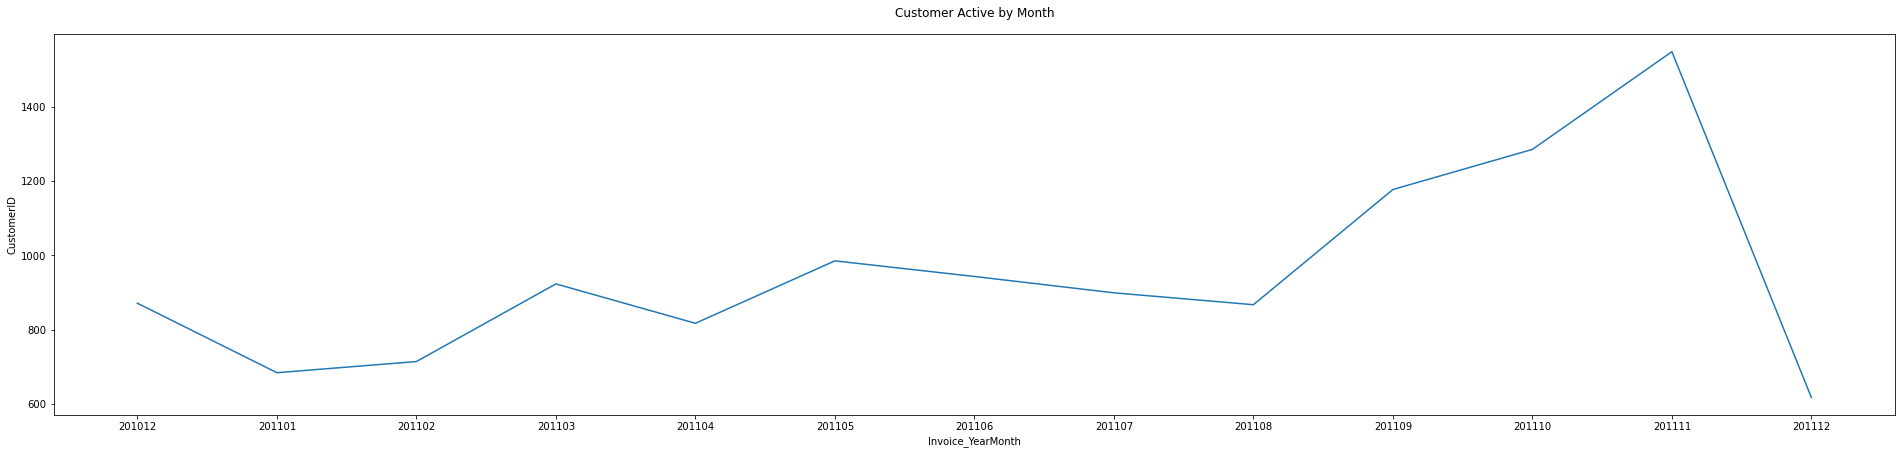

In [100]:
plt.figure(figsize = (33, 7))
g=sns.lineplot(data=df_monthly_cus_active,x='Invoice_YearMonth',y='CustomerID')
g.set_title('Customer Active by Month',y=1.03)
plt.show()

In [101]:
plot_data =[
    go.Line(
        x=df_monthly_cus_active['Invoice_YearMonth'],
        y= df_monthly_cus_active['CustomerID']
    )
]
plot_layout = go.Layout(
    xaxis = {'type':'category'},
    title ='Monthly Customer Active'
)
fig= go.Figure(data=plot_data,layout=plot_layout)
pyoff.plot(fig)

c:\Users\DUONG-PC\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'temp-plot.html'

Trung bình 1 tháng có bao nhiêu sản phẩm bán ra

In [102]:
df_monthly_items_sold = df_retail.groupby('Invoice_YearMonth')['Quantity'].sum().reset_index()
df_monthly_items_sold

,Invoice_YearMonth,Quantity
0,201012,342228
1,201101,308966
2,201102,277989
3,201103,351872
4,201104,289098
5,201105,380391
6,201106,341623
7,201107,391116
8,201108,406199
9,201109,549817


In [103]:
df_monthly_items_sold['Quantity'].mean()

398188.46153846156

In [104]:
df_monthly_items_sold['Invoice_YearMonth'] = df_monthly_items_sold['Invoice_YearMonth'].astype(str)
fig = px.line(df_monthly_items_sold, x="Invoice_YearMonth", y="Quantity", title="Quantity Items Sold by Month",text = 'Quantity')
fig.update_traces(textposition="top center")
fig.show()

Revenue Per Month

In [105]:
df_Revenue_month=df_retail.groupby('Invoice_YearMonth')['Revenue'].sum().reset_index()
df_Revenue_month

,Invoice_YearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [106]:
df_RevenueMonth['Revenue'].mean()

749826.7641538461

In [107]:
df_Revenue_month['Invoice_YearMonth'] = df_Revenue_month['Invoice_YearMonth'].astype(str)
fig = px.line(df_Revenue_month, x="Invoice_YearMonth", y="Revenue", title="Revenue by Month",text = 'Revenue')
fig.update_traces(textposition="top center")
fig.show()

New & Existing Customer

In [108]:
df_uk.shape

(495478, 14)

In [109]:
df_min_purchase=df_uk.groupby('CustomerID')['Invoice_YearMonth'].min().reset_index()
df_min_purchase.columns=['CustomerID','MinPurchaseYearMonth']
df_min_purchase

,CustomerID,MinPurchaseYearMonth
0,12346.0,201101
1,12747.0,201012
2,12748.0,201012
3,12749.0,201105
4,12820.0,201101
...,...,...
3945,18280.0,201103
3946,18281.0,201106
3947,18282.0,201108
3948,18283.0,201101


In [110]:
df_merge = df_uk.merge(df_min_purchase,on='CustomerID',how='left')
df_merge

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30,201012.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00,201012.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,12,201112,23.40,201105.0
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,12,201112,23.60,201012.0
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,12,201112,30.00,201012.0
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,12,201112,214.80,201012.0


In [111]:
df_merge['Customer_Type']='New'

In [112]:
df_merge.loc[df_merge['MinPurchaseYearMonth']!= df_merge['Invoice_YearMonth'],'Customer_Type'] = 'Existing'

In [113]:
df_merge

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue,MinPurchaseYearMonth,Customer_Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30,201012.0,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00,201012.0,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34,201012.0,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,12,201112,23.40,201105.0,Existing
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,12,201112,23.60,201012.0,Existing
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,12,201112,30.00,201012.0,Existing
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,12,201112,214.80,201012.0,Existing


In [114]:
df_merge['Customer_Type'].value_counts()

Existing    389714
New         105764
Name: Customer_Type, dtype: int64

In [115]:
df_merge1=df_merge.groupby(['Invoice_YearMonth','Customer_Type'])['Revenue'].sum().reset_index()
df_merge1

,Invoice_YearMonth,Customer_Type,Revenue
0,201012,Existing,192942.880
1,201012,New,483799.740
2,201101,Existing,277602.530
3,201101,New,156705.770
4,201102,Existing,280388.910
5,201102,New,127859.000
6,201103,Existing,399139.550
7,201103,New,160567.840
8,201104,Existing,333736.290
9,201104,New,108517.751


In [116]:
df_merge1['Invoice_YearMonth'] = df_merge1['Invoice_YearMonth'].astype(str)
fig = px.bar(df_merge1, x="Invoice_YearMonth", y="Revenue", title="Revenue Customer Type by Month",text = 'Revenue',color='Customer_Type')
fig.update_traces(textposition="inside")
fig.show()

In [117]:
countnew = df_merge.query("Customer_Type == 'New'").groupby('Invoice_YearMonth')['CustomerID'].nunique()
countexist = df_merge.query("Customer_Type == 'Existing'").groupby('Invoice_YearMonth')['CustomerID'].nunique()
df_user_ratio=countnew/countexist
df_user_ratio.reset_index()
df_user_ratio

Invoice_YearMonth
201012         inf
201101    1.124224
201102    0.904000
201103    0.792233
201104    0.510166
201105    0.343793
201106    0.281250
201107    0.236589
201108    0.192572
201109    0.304878
201110    0.328852
201111    0.236422
201112    0.058319
Name: CustomerID, dtype: float64

Monthly Retension Rate

In [118]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34


In [119]:
df_monthly_active = df_uk.groupby('Invoice_YearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

,Invoice_YearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [120]:
df_user_purchase =df_uk.groupby(['CustomerID','Invoice_YearMonth'])['Revenue'].sum().reset_index()
df_user_purchase

,CustomerID,Invoice_YearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [121]:
df_retension = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['Invoice_YearMonth']).reset_index()
df_retension

Invoice_YearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [122]:
df_retension.columns

Index(['CustomerID',       201012,       201101,       201102,       201103,
             201104,       201105,       201106,       201107,       201108,
             201109,       201110,       201111,       201112],
      dtype='object', name='Invoice_YearMonth')

In [123]:
months=df_retension.columns[2:]
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='Invoice_YearMonth')

In [124]:
# total customer at 201101
df_retension[201101].sum()

684

In [125]:
# total customer retension 201102 so 201101 la bao nhieu? tuong duong bang crosstab  1-1 o ca 2 cot 201101 and 201102
df_retension[(df_retension[201101] == 1) & (df_retension[201102] == 1)][201102].sum()
df_retension[(df_retension[201102] == 1) & (df_retension[201103] == 1)][201103].sum()
df_retension[(df_retension[201103] == 1) & (df_retension[201104] == 1)][201104].sum()
#...

310

In [126]:
retension_array =[]
for i in range(len(months) -1):
    retension_data ={}
    select_month = months[i+1]
    previous_month = months[i]
    retension_data['Invoice_YearMonth'] = int(select_month) # tao key-value cho dict
    retension_data['TotalUserCount'] = df_retension[select_month].sum() # tao key-value cho dict
    retension_data['RetainedUserCount'] = df_retension[(df_retension[select_month] == 1) & (df_retension[previous_month] == 1)][select_month].sum() # tao key-value cho dict
    retension_array.append(retension_data) # add dict to list
print(retension_array)



[{'Invoice_YearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'Invoice_YearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}, {'Invoice_YearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310}, {'Invoice_YearMonth': 201105, 'TotalUserCount': 985, 'RetainedUserCount': 369}, {'Invoice_YearMonth': 201106, 'TotalUserCount': 943, 'RetainedUserCount': 417}, {'Invoice_YearMonth': 201107, 'TotalUserCount': 899, 'RetainedUserCount': 379}, {'Invoice_YearMonth': 201108, 'TotalUserCount': 867, 'RetainedUserCount': 391}, {'Invoice_YearMonth': 201109, 'TotalUserCount': 1177, 'RetainedUserCount': 417}, {'Invoice_YearMonth': 201110, 'TotalUserCount': 1285, 'RetainedUserCount': 502}, {'Invoice_YearMonth': 201111, 'TotalUserCount': 1548, 'RetainedUserCount': 616}, {'Invoice_YearMonth': 201112, 'TotalUserCount': 617, 'RetainedUserCount': 402}]


In [127]:
df_retension_f = pd.DataFrame(retension_array)
df_retension_f


,Invoice_YearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417
5,201107,899,379
6,201108,867,391
7,201109,1177,417
8,201110,1285,502
9,201111,1548,616


In [128]:
df_retension_f['Retension_Rate']= df_retension_f['RetainedUserCount'] / df_retension_f['TotalUserCount']
df_retension_f['Retension_Rate'] = df_retension_f['Retension_Rate'].round(3)
df_retension_f

,Invoice_YearMonth,TotalUserCount,RetainedUserCount,Retension_Rate
0,201102,714,263,0.368
1,201103,923,305,0.330
2,201104,817,310,0.379
3,201105,985,369,0.375
4,201106,943,417,0.442
5,201107,899,379,0.422
6,201108,867,391,0.451
7,201109,1177,417,0.354
8,201110,1285,502,0.391
9,201111,1548,616,0.398


In [129]:
df_retension_f['Invoice_YearMonth'] = df_retension_f['Invoice_YearMonth'].astype(str)
fig=px.line(df_retension_f,x='Invoice_YearMonth',y='Retension_Rate',text='Retension_Rate')
fig.update_traces(textposition="top center")
fig.show()

Cohort 

In [130]:
df_min_purchase.head()

,CustomerID,MinPurchaseYearMonth
0,12346.0,201101
1,12747.0,201012
2,12748.0,201012
3,12749.0,201105
4,12820.0,201101


In [131]:
df_user_purchase.head()

,CustomerID,Invoice_YearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31


In [132]:
df_retension.head()

Invoice_YearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [133]:
df_retension = pd.merge(df_retension,df_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
df_retension

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [134]:
new_col_names = ['m_' +str(column) for column in df_retension.columns[:-1]]
new_col_names.append('MinPurchaseYearMonth')
df_retension.columns = new_col_names
df_retension

,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [135]:
selected_months = months[4]
previous_months= months[:4]# exp thang truoc
next_months= months[5:] # exp lay thang phia sau

In [136]:
total_user_count = df_retension[df_retension['MinPurchaseYearMonth']== 201101]['MinPurchaseYearMonth'].count() # tong so kh mua hang thang 1-2011
total_user_count

362

In [137]:
retension_array =[]
for i in range(len(months)):
    retension_data ={}
    selected_month = months[i]
    previous_months = months[:i]
    next_months = months[i+1:]
    for previous_month in previous_months:
        retension_data[previous_month]=np.nan
    
    total_user_count = df_retension[df_retension.MinPurchaseYearMonth == selected_month].MinPurchaseYearMonth.count()
    retension_data['TotalUserCount'] = total_user_count
    retension_data[selected_month] = 1
    query = "MinPurchaseYearMonth=={}".format(selected_month)

    for next_month in next_months:
        new_query = query + "and {} > 0".format(str('m_'+ str(next_month))) # lọc giá trị tháng tiếp theo trong bảng retension phía trên là phải = 1 thì mới tính khách hàng đó có quay lại mua hàng vào tháng tiếp theo
        retension_data[next_month] = np.round(df_retension.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2) # tính tổng các khách hàng quay lại tháng tiếp theo có giá trị là 1 rồi chia cho tổng user mua hàng trong tháng đó
    retension_array.append(retension_data)
df_retension = pd.DataFrame(retension_array)
df_retension

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
1,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
2,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
3,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
4,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
5,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
6,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
7,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
8,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
9,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.27,0.13


RFM: 
- R: Retency
- F: Frequency
- M: Moneytary
- => clustering = Kmean => visualize

In [138]:
from datetime import datetime, date, timedelta 
from __future__ import division
from sklearn.cluster import KMeans 

In [139]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,201012,20.34


In [140]:
# Retency quy 2 -2011
df_uk['Invoiceonlydate']= pd.to_datetime(df_uk['InvoiceDate']).dt.date
df_3m= df_uk[(df_uk['Invoiceonlydate']< date(2011,6,1)) &(df_uk['Invoiceonlydate'] >= date(2011,3,1))].reset_index()
df_3m

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue,Invoiceonlydate
0,97393,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,2011,3,1,8,201103,15.90,2011-03-01
1,97394,545220,48194,DOORMAT HEARTS,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,2011,3,1,8,201103,15.90,2011-03-01
2,97395,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01 08:30:00,1.65,14620.0,United Kingdom,2011,3,1,8,201103,19.80,2011-03-01
3,97396,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01 08:30:00,4.95,14620.0,United Kingdom,2011,3,1,8,201103,14.85,2011-03-01
4,97397,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01 08:30:00,3.75,14620.0,United Kingdom,2011,3,1,8,201103,15.00,2011-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95188,192581,555150,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,3,2011-05-31 15:53:00,3.25,NaN,United Kingdom,2011,5,31,15,201105,9.75,2011-05-31
95189,192582,555150,22983,CARD BILLBOARD FONT,3,2011-05-31 15:53:00,0.42,NaN,United Kingdom,2011,5,31,15,201105,1.26,2011-05-31
95190,192583,555150,23169,CLASSIC GLASS COOKIE JAR,3,2011-05-31 15:53:00,4.15,NaN,United Kingdom,2011,5,31,15,201105,12.45,2011-05-31
95191,192584,555150,23298,SPOTTY BUNTING,5,2011-05-31 15:53:00,4.95,NaN,United Kingdom,2011,5,31,15,201105,24.75,2011-05-31


In [141]:
df_user=pd.DataFrame(df_3m['CustomerID'].unique())
df_user.columns=['CustomerID']
df_user

,CustomerID
0,14620.0
1,14740.0
2,13880.0
3,16462.0
4,17068.0
...,...
1836,14819.0
1837,18190.0
1838,15163.0
1839,18204.0


In [142]:
df_max_Purchase = df_3m.groupby('CustomerID')['Invoiceonlydate'].max().reset_index(name='MaxPurchaseDate')
df_max_Purchase

,CustomerID,MaxPurchaseDate
0,12747.0,2011-05-25
1,12748.0,2011-05-31
2,12749.0,2011-05-23
3,12821.0,2011-05-09
4,12823.0,2011-03-30
...,...,...
1835,18272.0,2011-05-11
1836,18273.0,2011-03-27
1837,18280.0,2011-03-07
1838,18283.0,2011-05-23


In [143]:
df_max_Purchase['Recency'] = (df_max_Purchase['MaxPurchaseDate'].max() - df_max_Purchase['MaxPurchaseDate']).dt.days
df_max_Purchase

,CustomerID,MaxPurchaseDate,Recency
0,12747.0,2011-05-25,6
1,12748.0,2011-05-31,0
2,12749.0,2011-05-23,8
3,12821.0,2011-05-09,22
4,12823.0,2011-03-30,62
...,...,...,...
1835,18272.0,2011-05-11,20
1836,18273.0,2011-03-27,65
1837,18280.0,2011-03-07,85
1838,18283.0,2011-05-23,8


In [144]:
df_user = df_user.merge(df_max_Purchase,on='CustomerID')
df_user

,CustomerID,MaxPurchaseDate,Recency
0,14620.0,2011-05-19,12
1,14740.0,2011-05-26,5
2,13880.0,2011-05-06,25
3,16462.0,2011-03-01,91
4,17068.0,2011-05-19,12
...,...,...,...
1835,14819.0,2011-05-31,0
1836,18190.0,2011-05-31,0
1837,15163.0,2011-05-31,0
1838,18204.0,2011-05-31,0


In [145]:
df_user['Recency'].describe()

count    1840.000000
mean       35.338043
std        26.220317
min         0.000000
25%        12.000000
50%        26.000000
75%        56.000000
max        91.000000
Name: Recency, dtype: float64

In [146]:
fig = px.histogram(df_user, x="Recency",title='Recency Histogram')
fig.show()

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\2432703518.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\2432703518.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFr

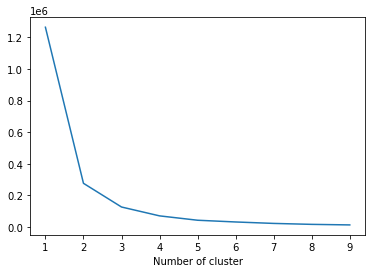

In [147]:
from sklearn.cluster import KMeans 
sse={}
df_recency = df_user[['Recency']]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k]=kmeans.inertia_ # binh phuong khoang cach toi trung tam cua cac cum
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()
    


In [148]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [149]:
df_user

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,14620.0,2011-05-19,12,2
1,14740.0,2011-05-26,5,2
2,13880.0,2011-05-06,25,1
3,16462.0,2011-03-01,91,0
4,17068.0,2011-05-19,12,2
...,...,...,...,...
1835,14819.0,2011-05-31,0,2
1836,18190.0,2011-05-31,0,2
1837,15163.0,2011-05-31,0,2
1838,18204.0,2011-05-31,0,2


In [150]:
df_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,350.0,77.017143,8.385398,64.0,70.0,76.0,84.75,91.0
1,444.0,24.581081,4.960358,18.0,20.0,23.0,27.00,35.0
2,608.0,8.501645,4.397843,0.0,5.0,8.0,12.00,16.0
3,438.0,50.189498,7.298674,40.0,43.0,49.0,56.00,63.0


In [151]:
df_CTE1 = df_user.groupby('RecencyCluster')['Recency'].mean().reset_index()
df_CTE1

,RecencyCluster,Recency
0,0,77.017143
1,1,24.581081
2,2,8.501645
3,3,50.189498


In [152]:
df_CTE1 = df_CTE1.sort_values(by='Recency',ascending= False).reset_index(drop=True)
df_CTE1

,RecencyCluster,Recency
0,0,77.017143
1,3,50.189498
2,1,24.581081
3,2,8.501645


In [153]:
df_CTE1['index'] = df_CTE1.index
df_user = df_user.merge(df_CTE1[['RecencyCluster','index']],on = 'RecencyCluster')
df_user

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster,index
0,14620.0,2011-05-19,12,2,3
1,14740.0,2011-05-26,5,2,3
2,17068.0,2011-05-19,12,2,3
3,12971.0,2011-05-27,4,2,3
4,15194.0,2011-05-25,6,2,3
...,...,...,...,...,...
1835,13482.0,2011-04-21,40,3,1
1836,13862.0,2011-04-21,40,3,1
1837,14512.0,2011-04-21,40,3,1
1838,15810.0,2011-04-21,40,3,1


In [154]:
df_user = df_user.drop(['RecencyCluster'],axis=1)
df_user = df_user.rename(columns={'index':'RencencyCLuster'})
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster
0,14620.0,2011-05-19,12,3
1,14740.0,2011-05-26,5,3
2,17068.0,2011-05-19,12,3
3,12971.0,2011-05-27,4,3
4,15194.0,2011-05-25,6,3
...,...,...,...,...
1835,13482.0,2011-04-21,40,1
1836,13862.0,2011-04-21,40,1
1837,14512.0,2011-04-21,40,1
1838,15810.0,2011-04-21,40,1


In [155]:
df_user.groupby('RencencyCLuster')['Recency'].describe()
#cang lau khong mua hang thi diem recency cluster cang cao

,count,mean,std,min,25%,50%,75%,max
RencencyCLuster,,,,,,,,
0,350.0,77.017143,8.385398,64.0,70.0,76.0,84.75,91.0
1,438.0,50.189498,7.298674,40.0,43.0,49.0,56.00,63.0
2,444.0,24.581081,4.960358,18.0,20.0,23.0,27.00,35.0
3,608.0,8.501645,4.397843,0.0,5.0,8.0,12.00,16.0


Frequency

In [156]:
df_frequency = df_3m.groupby('CustomerID')['Invoiceonlydate'].count().reset_index(name='Frequency')
df_frequency

,CustomerID,Frequency
0,12747.0,35
1,12748.0,582
2,12749.0,54
3,12821.0,6
4,12823.0,1
...,...,...
1835,18272.0,59
1836,18273.0,1
1837,18280.0,10
1838,18283.0,100


In [157]:
df_user = df_user.merge(df_frequency,on='CustomerID',how='inner')
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency
0,14620.0,2011-05-19,12,3,30
1,14740.0,2011-05-26,5,3,89
2,17068.0,2011-05-19,12,3,76
3,12971.0,2011-05-27,4,3,73
4,15194.0,2011-05-25,6,3,64
...,...,...,...,...,...
1835,13482.0,2011-04-21,40,1,11
1836,13862.0,2011-04-21,40,1,11
1837,14512.0,2011-04-21,40,1,14
1838,15810.0,2011-04-21,40,1,32


In [158]:
fig = px.histogram(df_user, x="Frequency",title='Frequency Histogram')
fig.show()

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\857827140.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\857827140.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFram

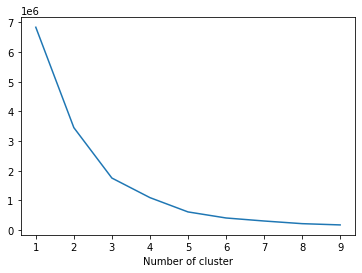

In [159]:
sse={}
df_frequency = df_user[['Frequency']]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    sse[k]=kmeans.inertia_ # binh phuong khoang cach toi trung tam cua cac cum
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [161]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])
df_user

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster
0,14620.0,2011-05-19,12,3,30,0
1,14740.0,2011-05-26,5,3,89,1
2,17068.0,2011-05-19,12,3,76,1
3,12971.0,2011-05-27,4,3,73,1
4,15194.0,2011-05-25,6,3,64,1
...,...,...,...,...,...,...
1835,13482.0,2011-04-21,40,1,11,0
1836,13862.0,2011-04-21,40,1,11,0
1837,14512.0,2011-04-21,40,1,14,0
1838,15810.0,2011-04-21,40,1,32,0


In [162]:
df_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1238.0,16.169628,9.976868,1.0,8.0,15.0,23.00,37.0
1,479.0,59.183716,17.002328,38.0,45.0,56.0,68.50,104.0
2,10.0,614.400000,283.186707,412.0,440.0,540.0,636.75,1364.0
3,113.0,151.964602,48.147268,106.0,118.0,132.0,172.00,345.0


In [165]:
df_CTE2 = df_user.groupby('FrequencyCluster')['Frequency'].mean().reset_index()
df_CTE2 = df_CTE2.sort_values(by='Frequency',ascending=True).reset_index(drop=True)
df_CTE2['index'] = df_CTE2.index
df_user = df_user.merge(df_CTE2[['FrequencyCluster','index']], on = 'FrequencyCluster',how='inner')
df_user = df_user.drop(['FrequencyCluster'],axis= 1)
df_user = df_user.rename(columns={'index':'FrequencyCluster'})
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster
0,14620.0,2011-05-19,12,3,30,0
1,18075.0,2011-05-19,12,3,35,0
2,15660.0,2011-05-27,4,3,34,0
3,14676.0,2011-05-16,15,3,18,0
4,12747.0,2011-05-25,6,3,35,0
...,...,...,...,...,...,...
1835,15039.0,2011-05-25,6,3,436,3
1836,13089.0,2011-05-26,5,3,452,3
1837,12748.0,2011-05-31,0,3,582,3
1838,14769.0,2011-05-22,9,3,558,3


Moneytary Value

In [166]:
df_3m.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue,Invoiceonlydate
0,97393,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,2011,3,1,8,201103,15.90,2011-03-01
1,97394,545220,48194,DOORMAT HEARTS,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,2011,3,1,8,201103,15.90,2011-03-01
2,97395,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01 08:30:00,1.65,14620.0,United Kingdom,2011,3,1,8,201103,19.80,2011-03-01
3,97396,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01 08:30:00,4.95,14620.0,United Kingdom,2011,3,1,8,201103,14.85,2011-03-01
4,97397,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01 08:30:00,3.75,14620.0,United Kingdom,2011,3,1,8,201103,15.00,2011-03-01


In [168]:
df_Revenue3m = df_3m.groupby('CustomerID')['Revenue'].sum().reset_index()
df_Revenue3m

,CustomerID,Revenue
0,12747.0,1082.09
1,12748.0,4336.73
2,12749.0,782.10
3,12821.0,92.72
4,12823.0,459.00
...,...,...
1835,18272.0,966.74
1836,18273.0,51.00
1837,18280.0,180.60
1838,18283.0,217.15


In [169]:
df_user = df_user.merge(df_Revenue3m,on="CustomerID",how= 'inner')
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue
0,14620.0,2011-05-19,12,3,30,0,393.28
1,18075.0,2011-05-19,12,3,35,0,638.12
2,15660.0,2011-05-27,4,3,34,0,484.62
3,14676.0,2011-05-16,15,3,18,0,1144.77
4,12747.0,2011-05-25,6,3,35,0,1082.09
...,...,...,...,...,...,...,...
1835,15039.0,2011-05-25,6,3,436,3,6741.59
1836,13089.0,2011-05-26,5,3,452,3,11757.87
1837,12748.0,2011-05-31,0,3,582,3,4336.73
1838,14769.0,2011-05-22,9,3,558,3,4966.36


In [170]:
fig = px.histogram(df_user, x="Revenue",title='Revenue Histogram')
fig.show()

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\3845021336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\3845021336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFr

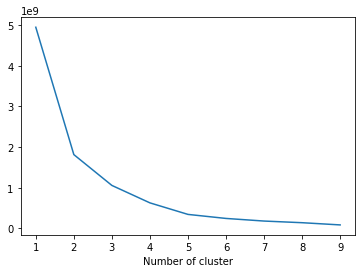

In [171]:
sse={}
df_Revenue3m = df_user[['Revenue']]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(df_Revenue3m)
    df_Revenue3m["clusters"] = kmeans.labels_
    sse[k]=kmeans.inertia_ # binh phuong khoang cach toi trung tam cua cac cum
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [173]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df_user[['Revenue']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])
df_user

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,14620.0,2011-05-19,12,3,30,0,393.28,0
1,18075.0,2011-05-19,12,3,35,0,638.12,0
2,15660.0,2011-05-27,4,3,34,0,484.62,0
3,14676.0,2011-05-16,15,3,18,0,1144.77,0
4,12747.0,2011-05-25,6,3,35,0,1082.09,0
...,...,...,...,...,...,...,...,...
1835,15039.0,2011-05-25,6,3,436,3,6741.59,3
1836,13089.0,2011-05-26,5,3,452,3,11757.87,1
1837,12748.0,2011-05-31,0,3,582,3,4336.73,3
1838,14769.0,2011-05-22,9,3,558,3,4966.36,3


In [175]:
df_CTE3 = df_user.groupby('RevenueCluster')['Revenue'].mean().reset_index()
df_CTE3 = df_CTE3.sort_values(by='Revenue',ascending=True).reset_index(drop=True)
df_CTE3['index'] = df_CTE3.index
df_user = df_user.merge(df_CTE3[['RevenueCluster','index']], on = 'RevenueCluster',how='inner')
df_user = df_user.drop(['RevenueCluster'],axis= 1)
df_user = df_user.rename(columns={'index':'RevenueCluster'})
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,14620.0,2011-05-19,12,3,30,0,393.28,0
1,18075.0,2011-05-19,12,3,35,0,638.12,0
2,15660.0,2011-05-27,4,3,34,0,484.62,0
3,14676.0,2011-05-16,15,3,18,0,1144.77,0
4,12747.0,2011-05-25,6,3,35,0,1082.09,0
...,...,...,...,...,...,...,...,...
1835,15311.0,2011-05-27,4,3,522,3,16309.61,2
1836,13089.0,2011-05-26,5,3,452,3,11757.87,2
1837,14298.0,2011-05-04,27,2,433,3,14984.73,2
1838,18102.0,2011-05-17,14,3,55,0,26113.81,3


In [176]:
df_user['Overrall'] = df_user['RencencyCLuster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3
4,12747.0,2011-05-25,6,3,35,0,1082.09,0,3
...,...,...,...,...,...,...,...,...,...
1835,15311.0,2011-05-27,4,3,522,3,16309.61,2,8
1836,13089.0,2011-05-26,5,3,452,3,11757.87,2,8
1837,14298.0,2011-05-04,27,2,433,3,14984.73,2,7
1838,18102.0,2011-05-17,14,3,55,0,26113.81,3,6


In [177]:
df_user['Segment'] = 'Low-value'
df_user.loc[df_user['Overrall']> 2,'Segment'] = 'Mid-Value'
df_user.loc[df_user['Overrall']> 4,'Segment'] = 'High-Value'
df_user

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,Segment
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3,Mid-Value
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3,Mid-Value
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3,Mid-Value
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3,Mid-Value
4,12747.0,2011-05-25,6,3,35,0,1082.09,0,3,Mid-Value
...,...,...,...,...,...,...,...,...,...,...
1835,15311.0,2011-05-27,4,3,522,3,16309.61,2,8,High-Value
1836,13089.0,2011-05-26,5,3,452,3,11757.87,2,8,High-Value
1837,14298.0,2011-05-04,27,2,433,3,14984.73,2,7,High-Value
1838,18102.0,2011-05-17,14,3,55,0,26113.81,3,6,High-Value


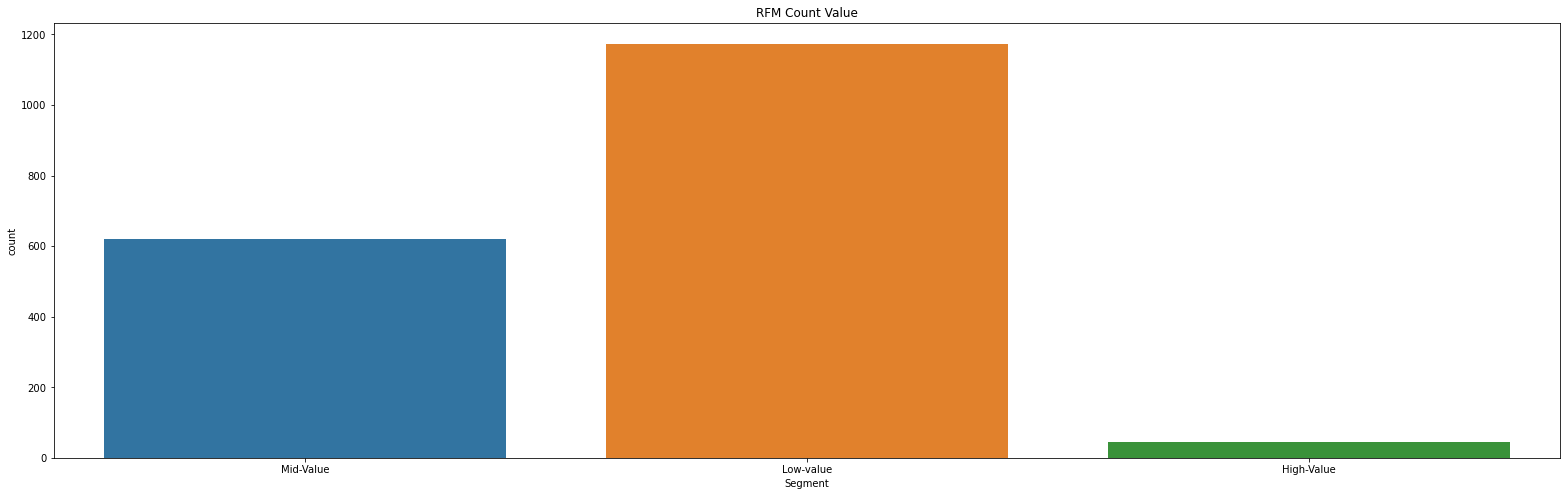

In [183]:
fig = plt.figure(figsize=(27,8))
sns.countplot(data=df_user,x='Segment')
plt.title('RFM Count Value')
plt.show()

LTV - Life Time Value

In [185]:
df_6m = df_uk[(df_uk['Invoiceonlydate']>=date(2011,6,1)) & (df_uk['Invoiceonlydate']<=date(2011,12,31))]
df_6m

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_date,Invoice_hour,Invoice_YearMonth,Revenue,Invoiceonlydate
192586,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,2011,6,1,7,201106,22.50,2011-06-01
192587,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,2011,6,1,7,201106,16.95,2011-06-01
192588,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,2011,6,1,7,201106,66.40,2011-06-01
192589,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,2011,6,1,7,201106,32.70,2011-06-01
192590,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,2011,6,1,7,201106,51.00,2011-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,12,201112,23.40,2011-12-09
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,12,201112,23.60,2011-12-09
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,12,201112,30.00,2011-12-09
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,12,201112,214.80,2011-12-09


In [186]:
df_user_6m= df_6m.groupby('CustomerID')['Revenue'].sum().reset_index(name='m6_Revenue')
df_user_6m

,CustomerID,m6_Revenue
0,12747.0,2104.61
1,12748.0,19749.28
2,12749.0,3086.10
3,12820.0,771.88
4,12822.0,918.98
...,...,...
3230,18278.0,173.90
3231,18281.0,80.82
3232,18282.0,176.60
3233,18283.0,1559.83


In [193]:
data= df_user_6m[df_user_6m['m6_Revenue']<10000]
fig = px.histogram(data,x='m6_Revenue',title='Revenue 6m Histogram')
fig.show()

In [196]:
# merge quy 2 voi quy 3&4
df_merge = df_user.merge(df_user_6m, on='CustomerID',how='left')
df_merge=df_merge.fillna(0)
df_merge

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,Segment,m6_Revenue
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3,Mid-Value,0.00
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3,Mid-Value,1322.75
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3,Mid-Value,858.09
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3,Mid-Value,1399.72
4,12747.0,2011-05-25,6,3,35,0,1082.09,0,3,Mid-Value,2104.61
...,...,...,...,...,...,...,...,...,...,...,...
1835,15311.0,2011-05-27,4,3,522,3,16309.61,2,8,High-Value,30379.72
1836,13089.0,2011-05-26,5,3,452,3,11757.87,2,8,High-Value,30694.99
1837,14298.0,2011-05-04,27,2,433,3,14984.73,2,7,High-Value,24053.81
1838,18102.0,2011-05-17,14,3,55,0,26113.81,3,6,High-Value,191954.59


In [197]:
#remove outliers
df_merge = df_merge[df_merge['m6_Revenue']<df_merge['m6_Revenue'].quantile(0.99)]

In [199]:
#create 3 clusters
kmeans = KMeans(n_clusters= 3)
kmeans.fit(df_merge[['m6_Revenue']])
df_merge['LTVCluster'] = kmeans.predict(df_merge[['m6_Revenue']])

C:\Users\DUONG-PC\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_9152\135346850.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
df_merge

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,Segment,m6_Revenue,LTVCluster
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3,Mid-Value,0.00,1
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3,Mid-Value,1322.75,1
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3,Mid-Value,858.09,1
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3,Mid-Value,1399.72,1
4,12747.0,2011-05-25,6,3,35,0,1082.09,0,3,Mid-Value,2104.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,15039.0,2011-05-25,6,3,436,3,6741.59,1,7,High-Value,6893.23,0
1827,14769.0,2011-05-22,9,3,558,3,4966.36,1,7,High-Value,4814.40,0
1828,16333.0,2011-05-31,0,3,29,0,10578.72,2,5,High-Value,13539.60,2
1831,16422.0,2011-05-27,4,3,129,1,10348.13,2,6,High-Value,16756.31,2


In [206]:
#order cluster number base on LTV
df_CTE4 = df_merge.groupby('LTVCluster')['m6_Revenue'].mean().reset_index()
df_CTE4 = df_CTE4.sort_values(by='m6_Revenue',ascending=True).reset_index(drop=True)
df_CTE4['index'] = df_CTE4.index
df_merge = df_merge.merge(df_CTE4[['LTVCluster','index']], on = 'LTVCluster',how='inner')
df_merge = df_merge.drop(['LTVCluster'],axis= 1)
df_merge = df_merge.rename(columns={'index':'LTVCluster'})
df_merge

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,Segment,m6_Revenue,LTVCluster
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3,Mid-Value,0.00,0
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3,Mid-Value,1322.75,0
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3,Mid-Value,858.09,0
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3,Mid-Value,1399.72,0
4,14560.0,2011-05-27,4,3,12,0,562.28,0,3,Mid-Value,952.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,15856.0,2011-05-20,11,3,129,1,2579.26,1,5,High-Value,9263.90,2
1817,17735.0,2011-05-05,26,2,184,1,3122.99,1,4,Mid-Value,8091.01,2
1818,16333.0,2011-05-31,0,3,29,0,10578.72,2,5,High-Value,13539.60,2
1819,16422.0,2011-05-27,4,3,129,1,10348.13,2,6,High-Value,16756.31,2


In [207]:
df_merge.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1498.0,508.969760,532.798944,-609.40,0.0000,355.72,858.9150,1884.51
1,289.0,3281.868547,1246.415961,1896.24,2315.2600,2904.37,3957.4500,6893.23
2,34.0,10705.821176,3170.445646,7058.45,7996.7675,9833.55,13243.6075,18052.00


In [208]:
df_cluster = df_merge.copy()
df_cluster

,CustomerID,MaxPurchaseDate,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,Segment,m6_Revenue,LTVCluster
0,14620.0,2011-05-19,12,3,30,0,393.28,0,3,Mid-Value,0.00,0
1,18075.0,2011-05-19,12,3,35,0,638.12,0,3,Mid-Value,1322.75,0
2,15660.0,2011-05-27,4,3,34,0,484.62,0,3,Mid-Value,858.09,0
3,14676.0,2011-05-16,15,3,18,0,1144.77,0,3,Mid-Value,1399.72,0
4,14560.0,2011-05-27,4,3,12,0,562.28,0,3,Mid-Value,952.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,15856.0,2011-05-20,11,3,129,1,2579.26,1,5,High-Value,9263.90,2
1817,17735.0,2011-05-05,26,2,184,1,3122.99,1,4,Mid-Value,8091.01,2
1818,16333.0,2011-05-31,0,3,29,0,10578.72,2,5,High-Value,13539.60,2
1819,16422.0,2011-05-27,4,3,129,1,10348.13,2,6,High-Value,16756.31,2


In [209]:
#convert categorical columns to numerical
df_class = pd.get_dummies(df_cluster)
df_class.head()

,CustomerID,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,m6_Revenue,LTVCluster,...,MaxPurchaseDate_2011-05-23,MaxPurchaseDate_2011-05-24,MaxPurchaseDate_2011-05-25,MaxPurchaseDate_2011-05-26,MaxPurchaseDate_2011-05-27,MaxPurchaseDate_2011-05-29,MaxPurchaseDate_2011-05-31,Segment_High-Value,Segment_Low-value,Segment_Mid-Value
0,14620.0,12,3,30,0,393.28,0,3,0.00,0,...,0,0,0,0,0,0,0,0,0,1
1,18075.0,12,3,35,0,638.12,0,3,1322.75,0,...,0,0,0,0,0,0,0,0,0,1
2,15660.0,4,3,34,0,484.62,0,3,858.09,0,...,0,0,0,0,1,0,0,0,0,1
3,14676.0,15,3,18,0,1144.77,0,3,1399.72,0,...,0,0,0,0,0,0,0,0,0,1
4,14560.0,4,3,12,0,562.28,0,3,952.13,0,...,0,0,0,0,1,0,0,0,0,1


In [213]:
# calculate and show corr
corr_matrix = df_class.corr()
corr_matrix

,CustomerID,Recency,RencencyCLuster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overrall,m6_Revenue,LTVCluster,...,MaxPurchaseDate_2011-05-23,MaxPurchaseDate_2011-05-24,MaxPurchaseDate_2011-05-25,MaxPurchaseDate_2011-05-26,MaxPurchaseDate_2011-05-27,MaxPurchaseDate_2011-05-29,MaxPurchaseDate_2011-05-31,Segment_High-Value,Segment_Low-value,Segment_Mid-Value
CustomerID,1.000000,-0.002399,0.005977,-0.041699,-0.005271,-0.059981,-0.043978,-0.003133,-0.035490,-0.039404,...,-0.027530,0.000772,-0.054146,-0.038451,-0.021073,0.053450,0.056717,-0.051896,0.005218,0.009580
Recency,-0.002399,1.000000,-0.965430,-0.255521,-0.213802,-0.311287,-0.176972,-0.908939,-0.252471,-0.231388,...,-0.167876,-0.198215,-0.186093,-0.179647,-0.217035,-0.131818,-0.195874,-0.153373,0.731578,-0.697008
RencencyCLuster,0.005977,-0.965430,1.000000,0.250221,0.206953,0.313415,0.174161,0.935990,0.253233,0.231937,...,0.185469,0.211336,0.191713,0.179029,0.209447,0.119642,0.167799,0.160717,-0.807378,0.771674
Frequency,-0.041699,-0.255521,0.250221,1.000000,0.834486,0.493238,0.340535,0.500686,0.368590,0.363708,...,0.044773,0.056876,0.125245,0.096450,0.064549,0.134517,0.055771,0.470076,-0.334609,0.204241
FrequencyCluster,-0.005271,-0.213802,0.206953,0.834486,1.000000,0.459825,0.323870,0.508060,0.366576,0.359915,...,0.029559,0.062398,0.089807,0.123388,0.098114,0.109566,0.043563,0.466097,-0.341146,0.212002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaxPurchaseDate_2011-05-29,0.053450,-0.131818,0.119642,0.134517,0.109566,0.029070,0.007263,0.133856,0.022049,0.040087,...,-0.016345,-0.018625,-0.016895,-0.015777,-0.018458,1.000000,-0.014788,0.025762,-0.138319,0.132710
MaxPurchaseDate_2011-05-31,0.056717,-0.195874,0.167799,0.055771,0.043563,0.107635,0.069404,0.165702,0.028587,0.024209,...,-0.022924,-0.026121,-0.023696,-0.022128,-0.025888,-0.014788,1.000000,0.037645,-0.193993,0.185692
Segment_High-Value,-0.051896,-0.153373,0.160717,0.470076,0.466097,0.577521,0.681262,0.372638,0.469082,0.388979,...,0.030308,0.044290,0.053276,0.113940,0.208186,0.025762,0.037645,1.000000,-0.185806,-0.098259
Segment_Low-value,0.005218,0.731578,-0.807378,-0.334609,-0.341146,-0.364761,-0.240919,-0.820202,-0.286622,-0.268072,...,-0.214421,-0.244326,-0.221640,-0.206975,-0.242142,-0.138319,-0.193993,-0.185806,1.000000,-0.959574


In [214]:
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster                    1.000000
m6_Revenue                    0.853229
Revenue                       0.614746
RevenueCluster                0.497610
Segment_High-Value            0.388979
                                ...   
MaxPurchaseDate_2011-04-19   -0.046549
MaxPurchaseDate_2011-04-21   -0.050997
MaxPurchaseDate_2011-04-08   -0.051313
Recency                      -0.231388
Segment_Low-value            -0.268072
Name: LTVCluster, Length: 86, dtype: float64

In [229]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [221]:
X= df_class.drop(['LTVCluster','m6_Revenue'],axis= 1)
y = df_class['LTVCluster']

In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=56)

In [223]:
ltv_xgb_model = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1,objective='multi:softprob',n_jobs=-1).fit(X_train,y_train)

In [233]:
print('Accuracy of XGB classifier on training set: {:.2f}'
      .format(ltv_xgb_model.score(X_train,y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(ltv_xgb_model.score(X_test[X_train.columns],y_test)))


Accuracy of XGB classifier on training set: 0.94
Accuracy of XGB classifier on test set: 0.85


In [236]:
y_pred = ltv_xgb_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        74
           1       0.60      0.56      0.58        16
           2       1.00      0.50      0.67         2

    accuracy                           0.85        92
   macro avg       0.83      0.66      0.72        92
weighted avg       0.85      0.85      0.84        92



Predict customer next purchase day

In [239]:
import sklearn.cluster as KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score,train_test_split

In [242]:
df_39 = df_uk[(df_uk['Invoiceonlydate'] <date(2011,9,1)) & (df_uk['Invoiceonlydate'] >=date(2011,3,1))].reset_index(drop=True) # data tu thang 4 toi thang 9
df_912 = df_uk[(df_uk['Invoiceonlydate'] <date(2011,12,1)) & (df_uk['Invoiceonlydate'] >=date(2011,9,1))].reset_index(drop=True) # data tu thang 9 toi thang 12

In [243]:
df_912['Invoiceonlydate'].describe()

count         178694
unique            78
top       2011-11-29
freq            4166
Name: Invoiceonlydate, dtype: object

In [247]:
df_user_39 = pd.DataFrame(df_39['CustomerID'].unique())
df_user_39.columns = ['CustomerID']
df_user_39

,CustomerID
0,14620.0
1,14740.0
2,13880.0
3,16462.0
4,17068.0
...,...
2564,16083.0
2565,13726.0
2566,15690.0
2567,17777.0


In [251]:
df_912_first_purchase = df_912.groupby('CustomerID')['Invoiceonlydate'].min().reset_index(name = 'MinPurchaseDate')
df_912_first_purchase

,CustomerID,MinPurchaseDate
0,12747.0,2011-10-04
1,12748.0,2011-09-02
2,12749.0,2011-11-17
3,12820.0,2011-09-26
4,12822.0,2011-09-13
...,...,...
2592,18276.0,2011-10-27
2593,18277.0,2011-10-12
2594,18278.0,2011-09-27
2595,18283.0,2011-09-05


In [252]:
df_39_last_purchase = df_39.groupby('CustomerID')['Invoiceonlydate'].max().reset_index(name='MaxPurchaseDate')
df_39_last_purchase

,CustomerID,MaxPurchaseDate
0,12747.0,2011-08-22
1,12748.0,2011-08-30
2,12749.0,2011-08-18
3,12821.0,2011-05-09
4,12823.0,2011-08-04
...,...,...
2563,18280.0,2011-03-07
2564,18281.0,2011-06-12
2565,18282.0,2011-08-09
2566,18283.0,2011-07-14


In [259]:
df_purchase_date = pd.merge(df_39_last_purchase,df_912_first_purchase,how='left',on='CustomerID')
df_purchase_date

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12747.0,2011-08-22,2011-10-04
1,12748.0,2011-08-30,2011-09-02
2,12749.0,2011-08-18,2011-11-17
3,12821.0,2011-05-09,NaN
4,12823.0,2011-08-04,2011-09-26
...,...,...,...
2563,18280.0,2011-03-07,NaN
2564,18281.0,2011-06-12,NaN
2565,18282.0,2011-08-09,NaN
2566,18283.0,2011-07-14,2011-09-05


In [261]:
df_purchase_date['NextPurchaseDay'] = (df_purchase_date['MinPurchaseDate'] - df_purchase_date['MaxPurchaseDate']).dt.days
df_purchase_date

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12747.0,2011-08-22,2011-10-04,43.0
1,12748.0,2011-08-30,2011-09-02,3.0
2,12749.0,2011-08-18,2011-11-17,91.0
3,12821.0,2011-05-09,NaN,NaN
4,12823.0,2011-08-04,2011-09-26,53.0
...,...,...,...,...
2563,18280.0,2011-03-07,NaN,NaN
2564,18281.0,2011-06-12,NaN,NaN
2565,18282.0,2011-08-09,NaN,NaN
2566,18283.0,2011-07-14,2011-09-05,53.0


In [265]:
df_user_39 = pd.merge(df_user_39,df_purchase_date[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')
df_user_39=df_user_39.fillna(999)
df_user_39

,CustomerID,NextPurchaseDay_x,NextPurchaseDay_y,NextPurchaseDay
0,14620.0,999.0,999.0,999.0
1,14740.0,999.0,999.0,999.0
2,13880.0,58.0,58.0,58.0
3,16462.0,112.0,112.0,112.0
4,17068.0,16.0,16.0,16.0
...,...,...,...,...
2564,16083.0,999.0,999.0,999.0
2565,13726.0,62.0,62.0,62.0
2566,15690.0,999.0,999.0,999.0
2567,17777.0,61.0,61.0,61.0
